<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 163.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
df = df.dropna(subset=['JobSat', 'RemoteWork'])

In [5]:
df.shape

(29117, 114)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
df.loc[:, 'YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
}).astype(float)

In [7]:
bins = [0, 5, 10, 20, float('inf')]  # 0-5, 5-10, 10-20, >20 years
labels = ['0-5', '5-10', '10-20', '>20']  

df['ExperienceRange'] = pd.cut(df['YearsCodePro'].astype(float), bins=bins, labels=labels, right=False)

df['ExperienceRange'] = df['ExperienceRange'].cat.add_categories(['NA'])
df.loc[df['YearsCodePro'].isnull(), 'ExperienceRange'] = 'NA'

print(df[['YearsCodePro', 'ExperienceRange']].head())

   YearsCodePro ExperienceRange
10          NaN              NA
12         12.0           10-20
15         27.0             >20
18         10.0           10-20
20          0.0             0-5


In [13]:
median_jobsat = df.groupby('ExperienceRange', observed=False)['JobSat'].median().reset_index()
median_jobsat.columns = ['ExperienceRange', 'MedianJobSat']
print(median_jobsat)

  ExperienceRange  MedianJobSat
0             0-5           7.0
1            5-10           7.0
2           10-20           7.0
3             >20           8.0
4              NA           7.0


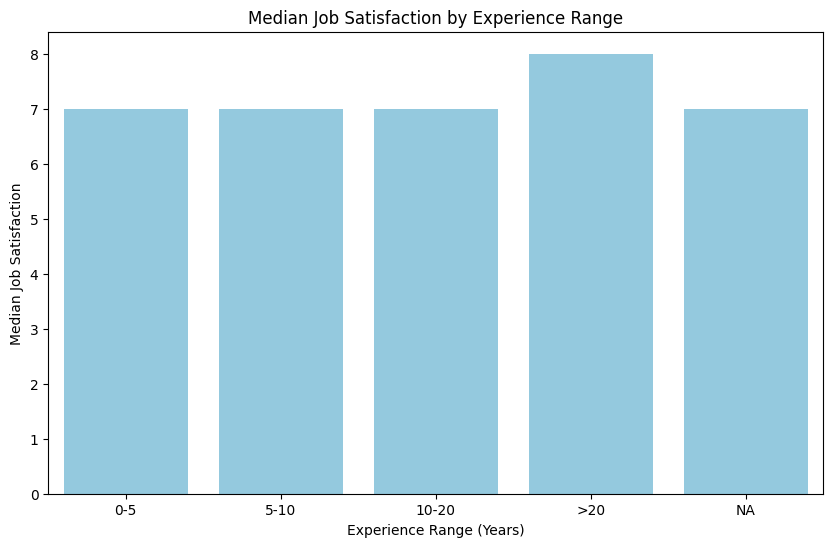

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='MedianJobSat', color='skyblue')
plt.title('Median Job Satisfaction by Experience Range', fontsize=12)
plt.xlabel('Experience Range (Years)', fontsize=10)
plt.ylabel('Median Job Satisfaction', fontsize=10)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


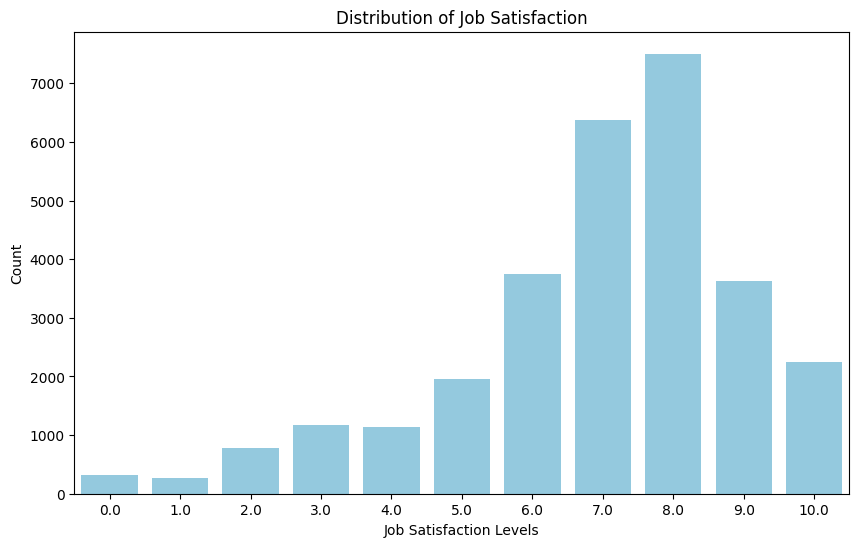

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', hue=None, color='skyblue')
plt.title('Distribution of Job Satisfaction', fontsize=12)
plt.xlabel('Job Satisfaction Levels', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


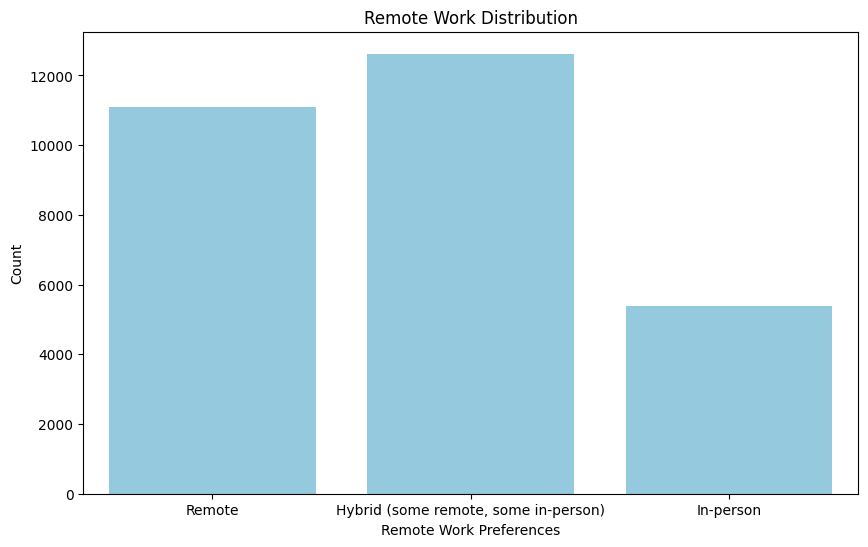

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', color='skyblue')
plt.title('Remote Work Distribution', fontsize=12)
plt.xlabel('Remote Work Preferences', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [17]:
cross_tab = pd.crosstab(
    [df['RemoteWork']],
    [df['Employment'], df['DevType']],
    margins=True
)
print(cross_tab)


Employment                           Employed, full-time             \
DevType                              Academic researcher Blockchain   
RemoteWork                                                            
Hybrid (some remote, some in-person)                 167          9   
In-person                                             90          9   
Remote                                                19         39   
All                                                  276         57   

Employment                                                          \
DevType                              Cloud infrastructure engineer   
RemoteWork                                                           
Hybrid (some remote, some in-person)                           119   
In-person                                                       26   
Remote                                                         149   
All                                                            294   

Employment 

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


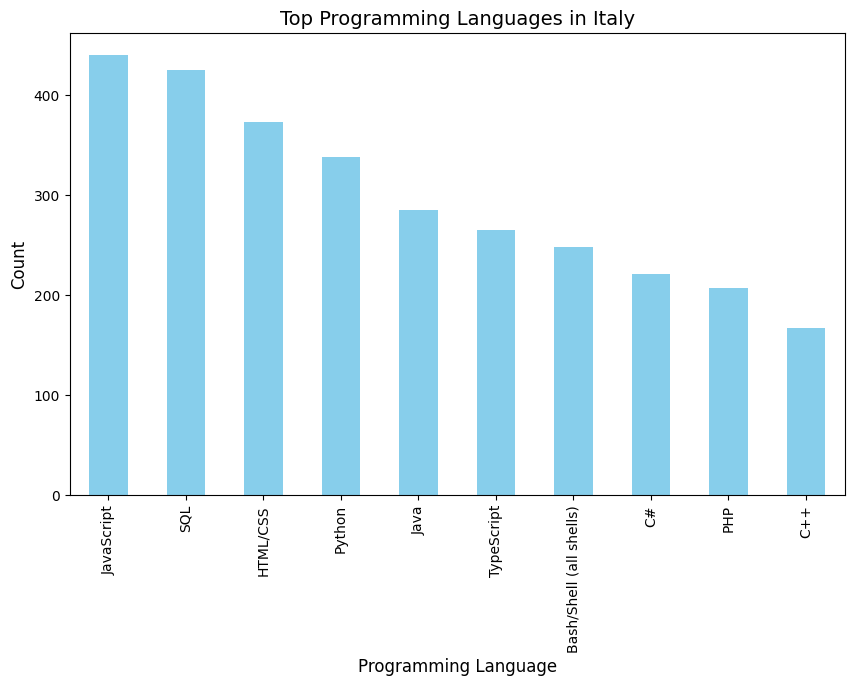

In [18]:
country = 'Italy'
country_data = df[df['Country'] == country]

language_counts = country_data['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

top_languages = language_counts.head(10)

plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')
plt.title(f'Top Programming Languages in {country}', fontsize=14)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between Years of Experience and Job Satisfaction: -0.03


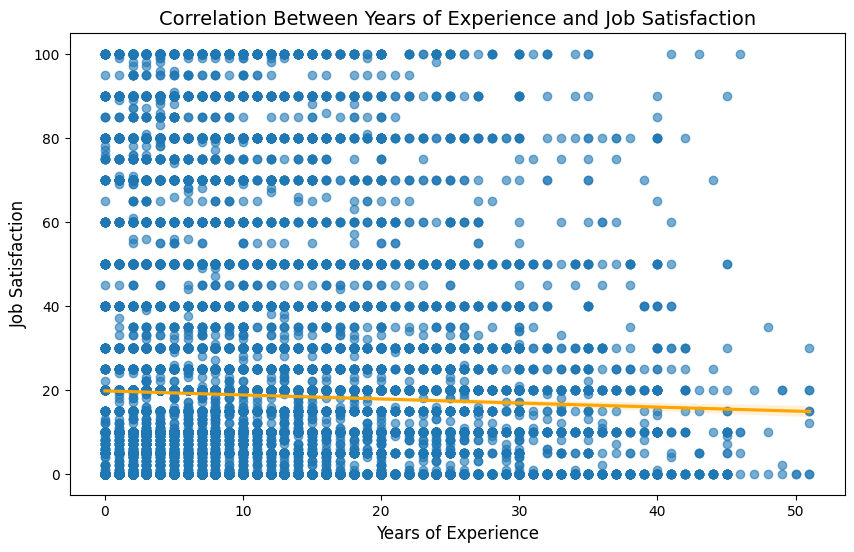

In [32]:
correlation_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
correlation_df['YearsCodePro'] = pd.to_numeric(correlation_df['YearsCodePro'], errors='coerce')
correlation_df = correlation_df.dropna(subset=['YearsCodePro'])
correlation = correlation_df['YearsCodePro'].corr(correlation_df['JobSatPoints_1'])
print(f"Correlation between Years of Experience and Job Satisfaction: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='YearsCodePro', y='JobSatPoints_1', data=correlation_df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [39]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)


In [40]:
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])
print(cross_tab)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10496   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6729   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

<Figure size 1400x800 with 0 Axes>

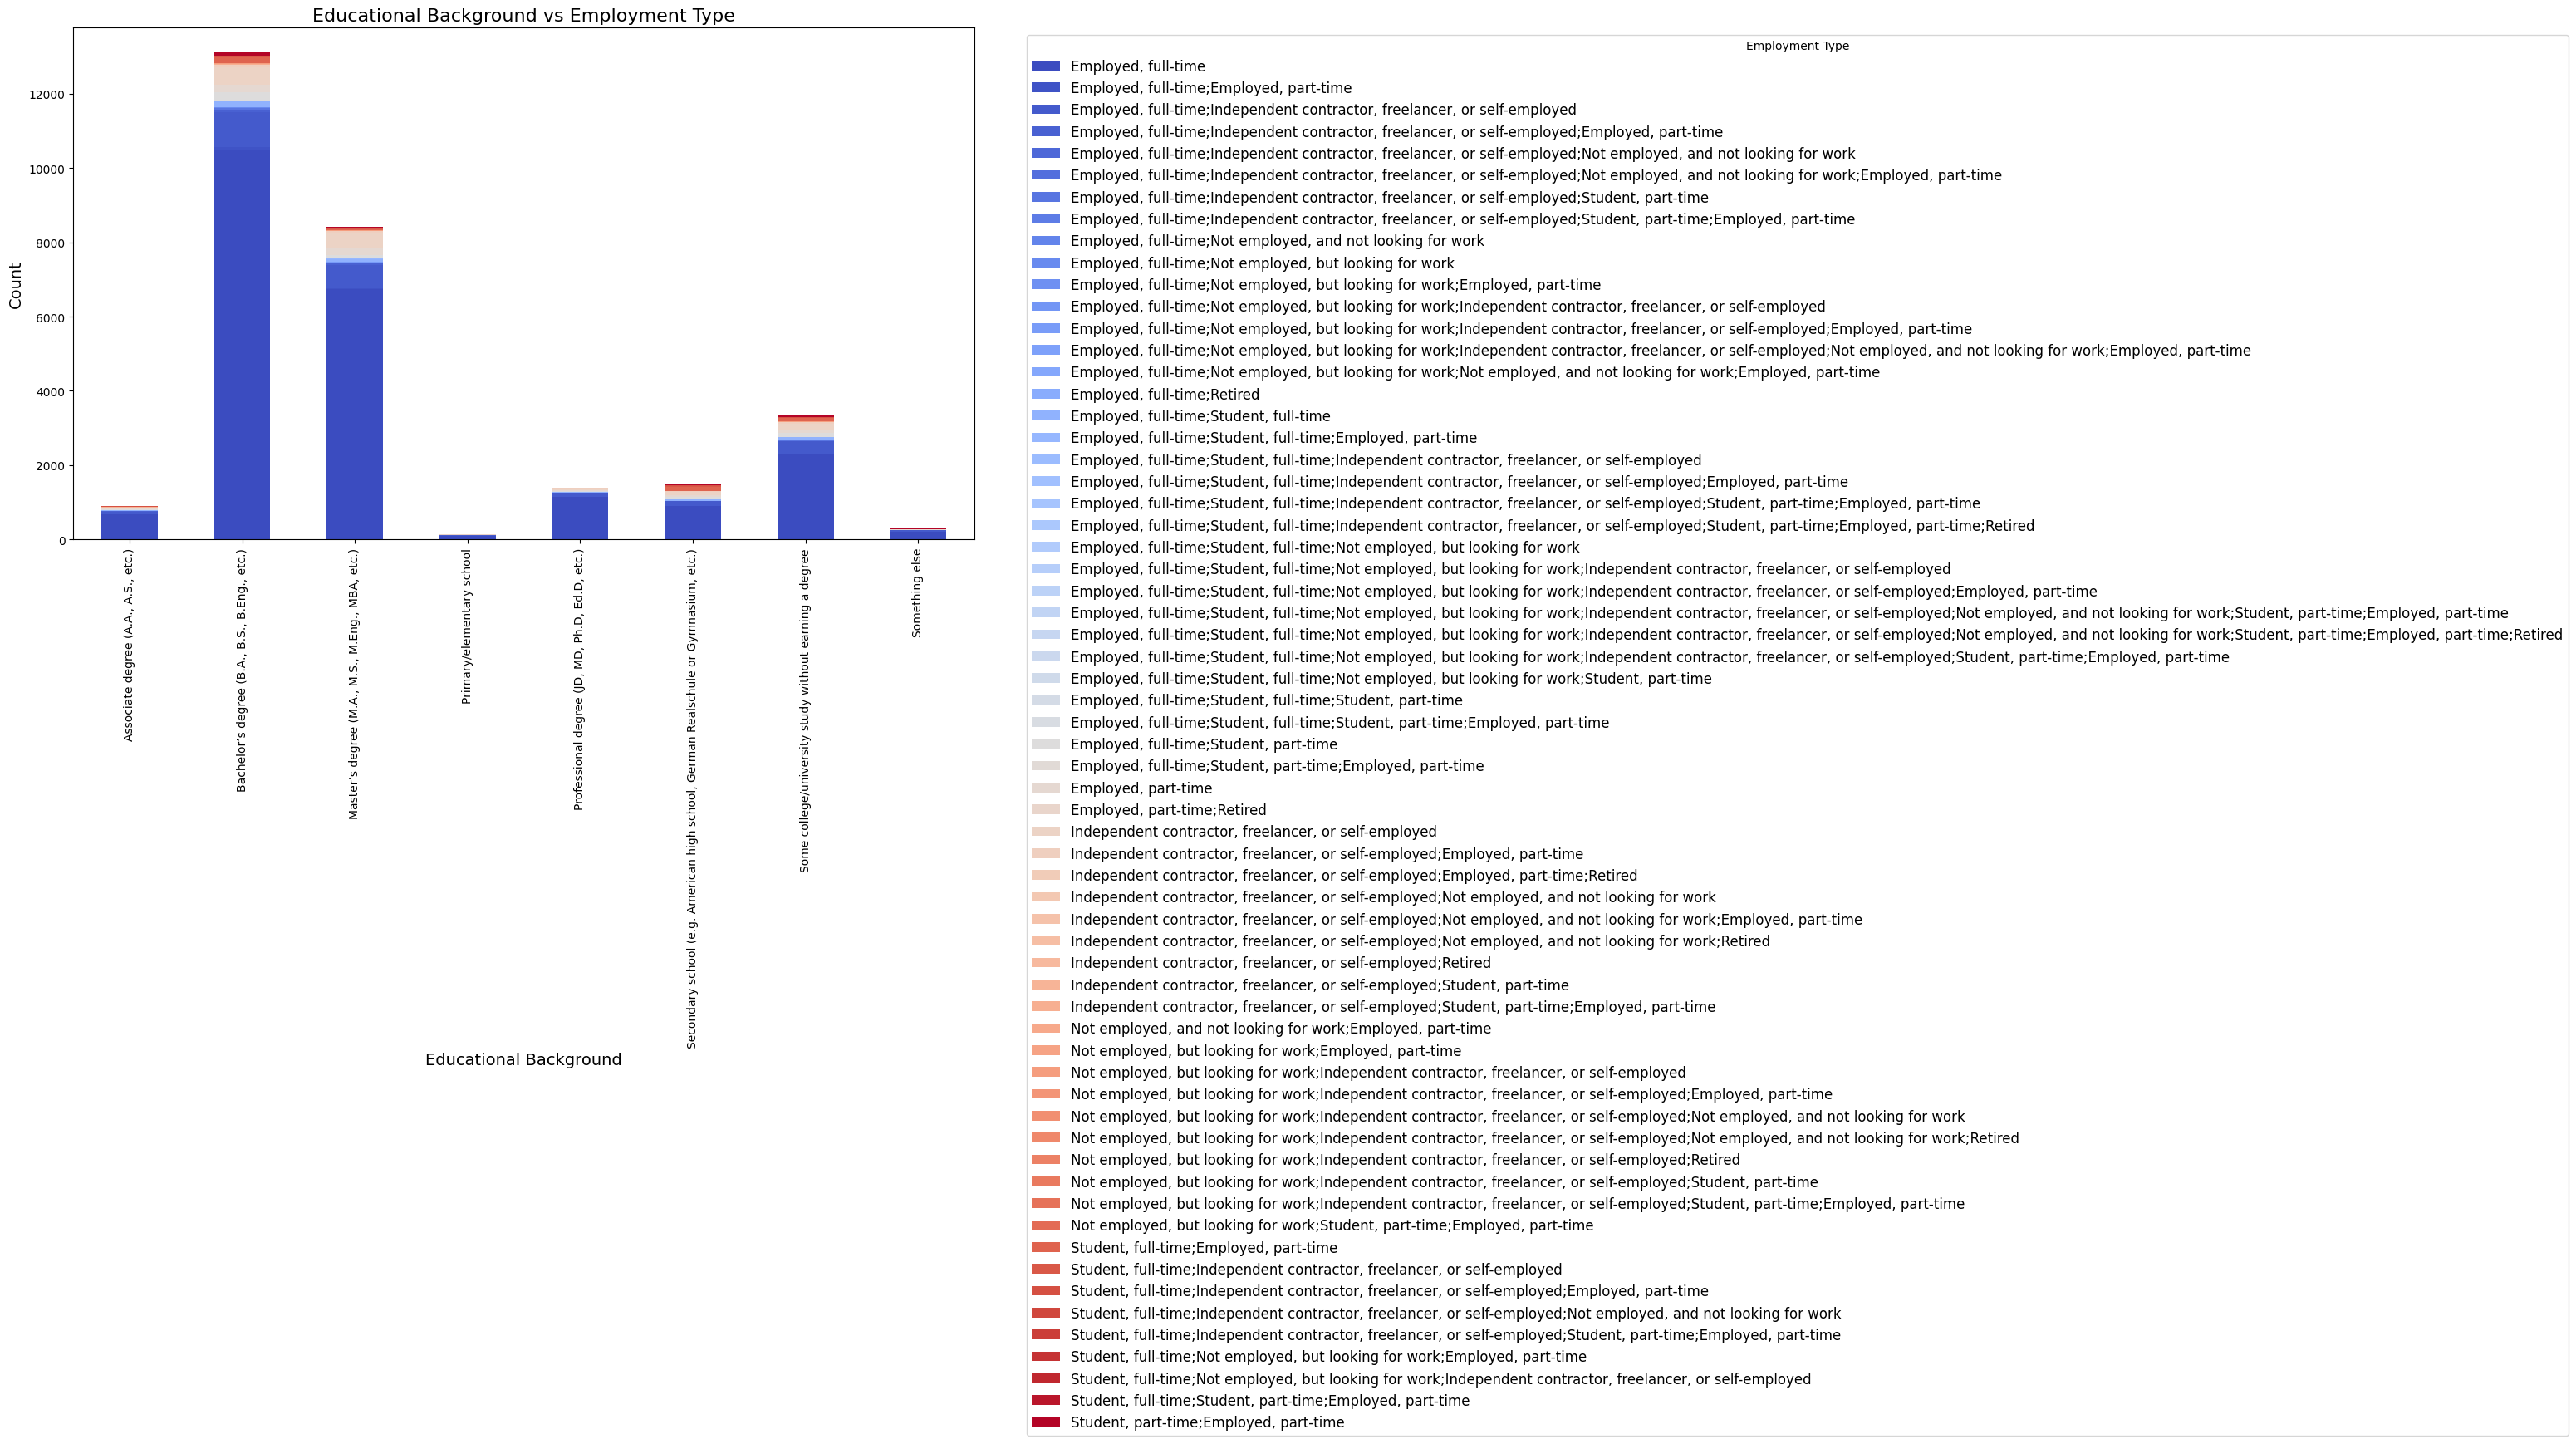

In [42]:
plt.figure(figsize=(14, 8))
cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 8))

plt.title('Educational Background vs Employment Type', fontsize=16)
plt.xlabel('Educational Background', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv('cleaned_and_analyzed_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
